<a href="https://colab.research.google.com/github/mithunglares/MobileAppUseCase/blob/main/MobileAppGooglePlayReiewsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Install the Pre-Required Modules***

In [2]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=5ec99828759ef7a5a1f83e6f8eb2b5789a973d1d92cd4f38a8b9254c10bb8471
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


# ***Step 2: Import the required Modules***

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all, reviews

# ***Step 3: Connecting to Google Play Store to pull comments from Users who gave Single * Rating***

1. Please note "com.bigbasket.mobileapp" is the id configured for Big Basket in this case. 
   You will need to have the respective Application ID configured based on your interest
2. ID can be obtained from Google Play Store, for Eg: "https://play.google.com/store/apps/details?id=com.bigbasket.mobileapp&hl=en-US"

In [ ]:
result,continuation_token = reviews(
    'com.bigbasket.mobileapp',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=10000,# defaults to 100
    filter_score_with=1
    )
result, _ = reviews(
    'com.bigbasket.mobileapp',
    continuation_token= continuation_token# defaults to None(load from the beginning)
)

# ***Step 4: Analysing the data, please execute to understand the DataFrame structure***

In [ ]:
df = pd.DataFrame.from_records(result)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               10000 non-null  object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  7698 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          9477 non-null   object        
 9   repliedAt             9477 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 781.4+ KB


## ***Step 5: Processing the Score for last 10,000 records of 1 star rating***

Analysis For Rating of 1 Star
crash:88
slowness:33
not responding:60
errors:128
payment issues:590
failed transactions:195
Total Count=10000 and Other Issues:8906


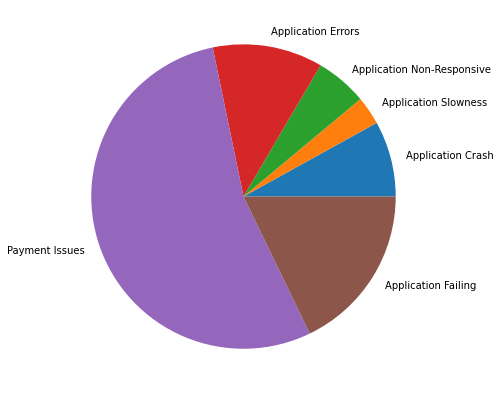

In [ ]:
#df.info()
#df.head()
#print(df['score'].value_counts())
#df['score'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
total_count1=len(df)
crash_count1=(df["content"].str.count('crash').sum())
slow_count1=(df["content"].str.count('slow').sum())
not_responding1=(df["content"].str.count('responding').sum())
error_count1=(df["content"].str.count('error').sum())
payment_count1=(df["content"].str.count('payment').sum())
fail_count1=(df["content"].str.count('fail').sum())

issues=['Application Crash', 'Application Slowness', 'Application Non-Responsive', 'Application Errors', 'Payment Issues', 'Application Failing']
data1=[crash_count1,slow_count1,not_responding1,error_count1,payment_count1,fail_count1]
Sum1=sum(data1)


others1=total_count1-Sum1
print("Analysis For Rating of 1 Star")
print("crash:{}".format(crash_count1))
print("slowness:{}".format(slow_count1))
print("not responding:{}".format(not_responding1))
print("errors:{}".format(error_count1))
print("payment issues:{}".format(payment_count1))
print("failed transactions:{}".format(fail_count1))
print("Total Count={} and Other Issues:{}".format(total_count1,others1))




fig = plt.figure(figsize =(10, 7))
plt.pie(data1, labels = issues)
plt.show()

In [1]:
#for cnt, i in enumerate(result):
#  print ("{} : {} : {} : {}".format(cnt,i['score'],i['content'],i['at']))


## ***Step 6: Processing the score for last 5,000 records of 2 star rating***

In [ ]:
result2,continuation_token2 = reviews(
    'com.bigbasket.mobileapp',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=5000,# defaults to 100
    filter_score_with=2
    )
result2, _ = reviews(
    'com.bigbasket.mobileapp',
    continuation_token=continuation_token2 # defaults to None(load from the beginning)
)

df2 = pd.DataFrame.from_records(result2)

In [ ]:
#df2.head()
#print(df2.info())


Analysis For Rating of 2 Star
crash:7.0
slowness:5.0
not responding:2.0
errors:19.0
payment issues:71.0
failed transactions:26.0
Total Count=886 and Other Issues:756.0


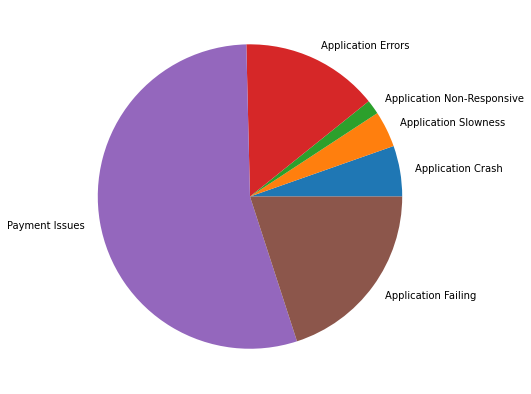

In [ ]:
total_count2=len(df2)
crash_count2=(df2["content"].str.count('crash').sum())
slow_count2=(df2["content"].str.count('slow').sum())
not_responding2=(df2["content"].str.count('responding').sum())
error_count2=(df2["content"].str.count('error').sum())
payment_count2=(df2["content"].str.count('payment').sum())
#payment_count2=0
fail_count2=(df2["content"].str.count('fail').sum())

data2=[crash_count2,slow_count2,not_responding2,error_count2,payment_count2,fail_count2]

Sum2=sum(data2)
others2=total_count2-Sum2
print("Analysis For Rating of 2 Star")
print("crash:{}".format(crash_count2))
print("slowness:{}".format(slow_count2))
print("not responding:{}".format(not_responding2))
print("errors:{}".format(error_count2))
print("payment issues:{}".format(payment_count2))
print("failed transactions:{}".format(fail_count2))
print("Total Count={} and Other Issues:{}".format(total_count2,others2))
fig2 = plt.figure(figsize =(10, 7))
plt.pie(data2, labels = issues)
 
# show plot
plt.show()

In [ ]:
#pip install azure-ai-textanalytics

### ***SENTIMENT ANALYSIS***

In [ ]:
#import azure 
#from azure.ai.textanalytics import TextAnalyticsClient
#from azure.core.credentials import AzureKeyCredential

###SIMPLE SCRIPT TO DOWNLOAD REVIEWS FROM GOOGLE PLAY FOR ANY APPLICATION